In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from page import streamlitShow 

In [ ]:
df = pd.read_csv("dataset/bankloan.csv")
df = df.drop("ID",axis=1)
df

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
X = df.drop('Personal.Loan',axis=1)
y = df['Personal.Loan']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)

In [ ]:

lr_default = LogisticRegression(max_iter=400)


lr_penalized1 = LogisticRegression(C=0.3, max_iter=200, penalty='l1', solver='liblinear')
lr_penalized2 = LogisticRegression(C=0.1, max_iter=200 ,penalty='l2', solver='lbfgs')

#Fitting
lr_default.fit(X_train, y_train)
lr_penalized1.fit(X_train, y_train)
lr_penalized2.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=200)

In [ ]:

rfcla_default = RandomForestClassifier()


rfcla_modified1 = RandomForestClassifier(n_estimators=200 ,max_depth=10, min_samples_split=2, 
                                    min_samples_leaf=1, max_features="log2", random_state=100)
rfcla_modified2 = RandomForestClassifier(n_estimators=100 ,max_depth=10, min_samples_split=2, 
                                    min_samples_leaf=1, max_features="sqrt", random_state=100)

#Fitting
rfcla_default.fit(X_train, y_train)
rfcla_modified1.fit(X_train, y_train)
rfcla_modified2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=100)

In [ ]:

lr = LogisticRegression()

param_grid = {
    'C': [0.1, 0.3, 0.5, 1, 5, 10],
    'max_iter': [100, 150, 200, 500],
    'penalty':['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

gridsearch_lr_model = grid_search.best_estimator_

print("Best Parameters for Logistic Regression: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))
print("Model score: ", gridsearch_lr_model.score(X_test, y_test))

C:\Users\babik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\babik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Best Parameters for Logistic Regression:  {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.95
Model score:  0.959


C:\Users\babik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\babik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\babik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

In [ ]:
rf_classifier = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
    'random_state':[1, 42, 100]
}

grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

gridsearch_rfcla_model = grid_search_rf.best_estimator_

print("Best Parameters for Random Forest Classifier: ", grid_search_rf.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search_rf.best_score_))
print("Model score: ", gridsearch_rfcla_model.score(X_test, y_test))

Best Parameters for Random Forest Classifier:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 100}
Best Cross-Validation Score: 0.99
Model score:  0.988


Logistic Regression score: 0.912
Precision: 0.6153846153846154
Recall: 0.32
F1-Score: 0.4210526315789474


Logistic Regression (Penalized L1) score: 0.954
Precision: 0.8857142857142857
Recall: 0.62
F1-Score: 0.7294117647058823


Logistic Regression (Penalized L2) score: 0.912
Precision: 0.6153846153846154
Recall: 0.32
F1-Score: 0.4210526315789474


Logistic Regression (GridSearchCV) score: 0.959
Precision: 0.9041095890410958
Recall: 0.66
F1-Score: 0.7630057803468209


Random Forest Classifier score: 0.989
Precision: 1.0
Recall: 0.89
F1-Score: 0.9417989417989417


Random Forest Classifier (Modified features 1) score: 0.987
Precision: 1.0
Recall: 0.87
F1-Score: 0.9304812834224598


Random Forest Classifier (Modified features 2) score: 0.985
Precision: 0.9885057471264368
Recall: 0.86
F1-Score: 0.9197860962566845


Random Forest Classifier (GridSearchCV) score: 0.988
Precision: 1.0
Recall: 0.88
F1-Score: 0.9361702127659575




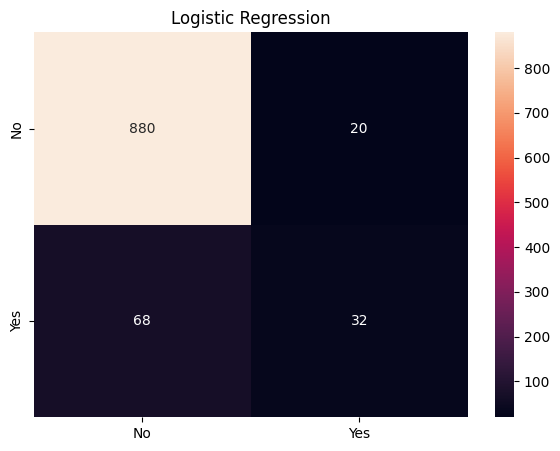

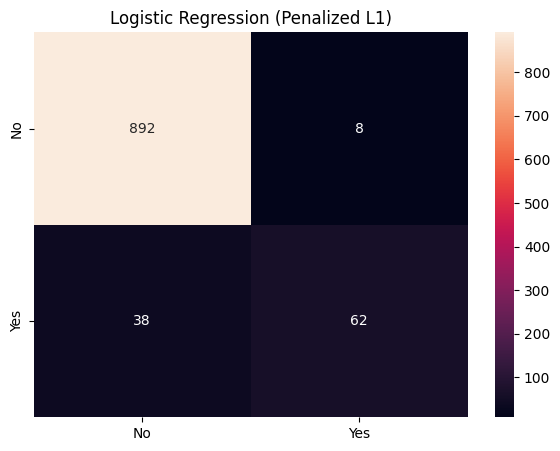

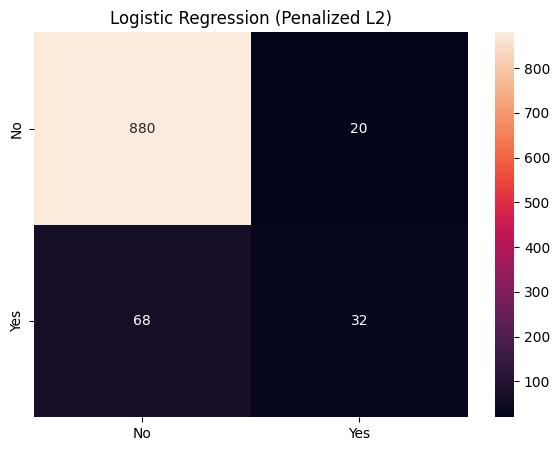

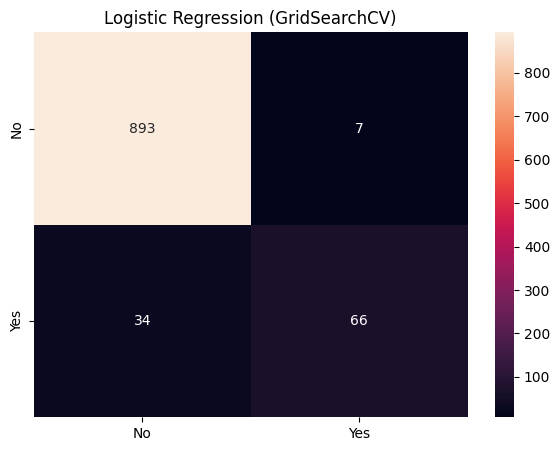

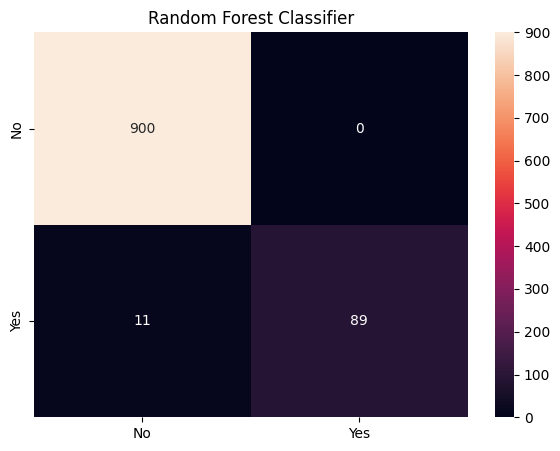

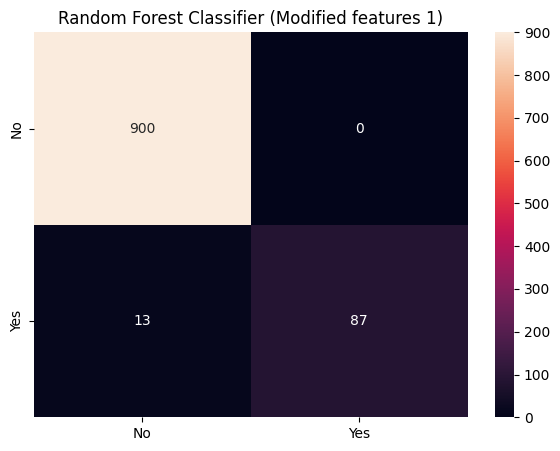

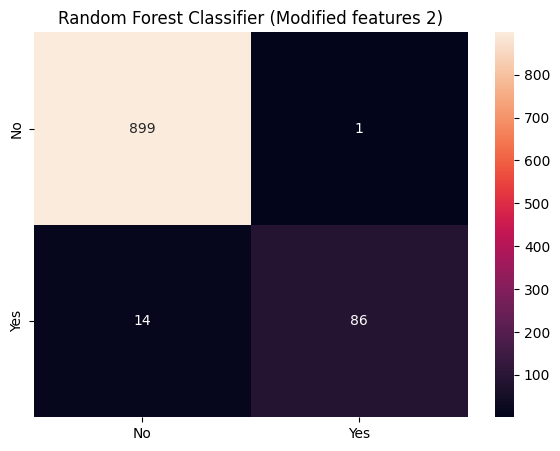

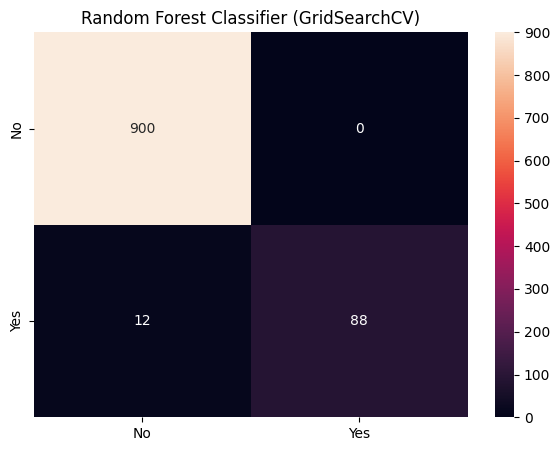

In [ ]:
models = [lr_default, lr_penalized1, lr_penalized2, gridsearch_lr_model, rfcla_default, rfcla_modified1, rfcla_modified2, gridsearch_rfcla_model]
model_names = ["Logistic Regression",
               "Logistic Regression (Penalized L1)", 
               "Logistic Regression (Penalized L2)",
               "Logistic Regression (GridSearchCV)",
               "Random Forest Classifier",
               "Random Forest Classifier (Modified features 1)",
               "Random Forest Classifier (Modified features 2)",
               "Random Forest Classifier (GridSearchCV)"]

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f"{model_name} score: {model.score(X_test, y_test)}")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    plt.title(f"{model_name}")
    sns.heatmap(df_cm, annot=True ,fmt='g')
    plt.savefig(f'graphs/{model_name} Confusion Matrix')
    print("\n")

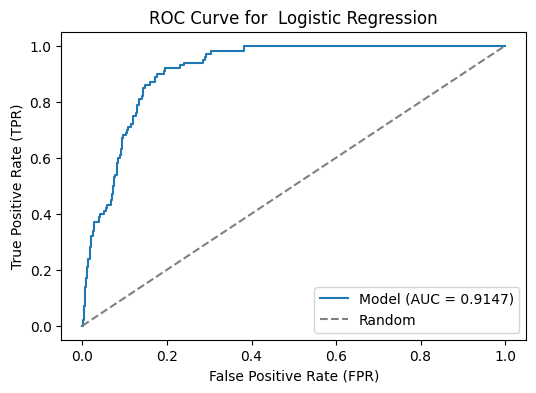

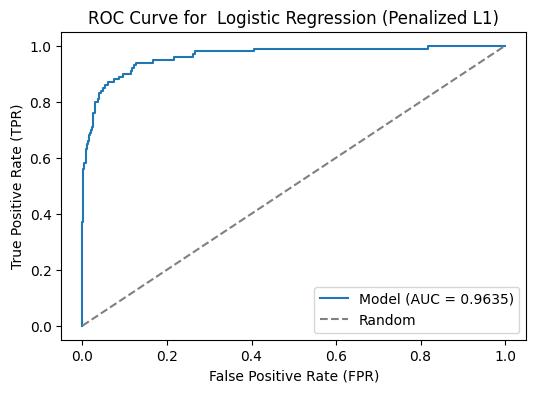

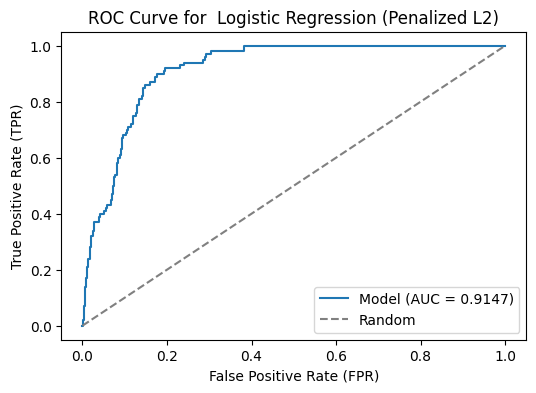

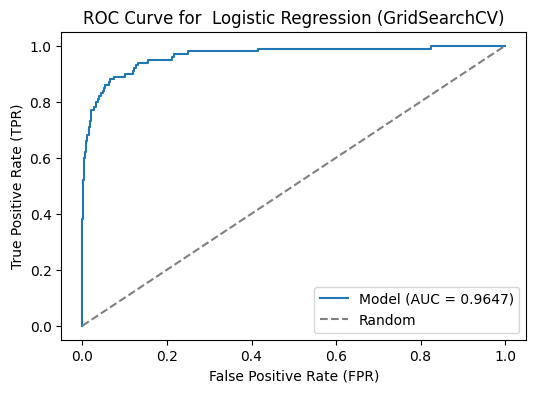

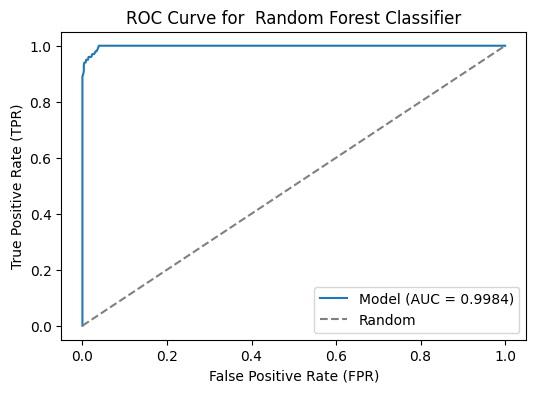

KeyboardInterrupt: 

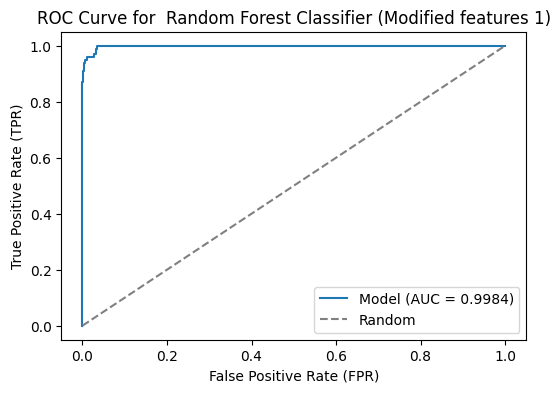

In [30]:
# ROC Curve and AUC for each model

for model, model_name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'Model (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for  {model_name}')
    plt.legend()
    plt.savefig(f'graphs/ROC Curve for {model_name}')
    plt.show()

streamlitShow(X_train, y_train, lr_pen1, best_rfcla_gridsearch)